In [5]:
import pandas as pd
import numpy as np
from sklearn import metrics, model_selection, ensemble, neighbors, svm, tree, neural_network, base
import matplotlib.pyplot as plt

import importlib
import datetime
import mlTest
import preprocessing
importlib.reload(mlTest)
importlib.reload(preprocessing)

<module 'preprocessing' from 'C:\\Users\\Chunlok Lo\\Documents\\cs4641\\unsupervised_dim_reduct\\impl\\preprocessing.py'>

In [6]:
df = pd.read_csv("data/forest/covtype.csv")
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [7]:
df['Cover_Type'].value_counts()
#getting train_set
df1 = df[df['Cover_Type'] == 1].sample(1620)
df2 = df[df['Cover_Type'] == 2].sample(1620)
df3 = df[df['Cover_Type'] == 3].sample(1620)
df4 = df[df['Cover_Type'] == 4].sample(1620)
df5 = df[df['Cover_Type'] == 5].sample(1620)
df6 = df[df['Cover_Type'] == 6].sample(1620)
df7 = df[df['Cover_Type'] == 7].sample(1620)
df_train = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0)
df_train['Cover_Type'].value_counts()

df = df.drop(df_train.index)

df1 = df[df['Cover_Type'] == 1].sample(540)
df2 = df[df['Cover_Type'] == 2].sample(540)
df3 = df[df['Cover_Type'] == 3].sample(540)
df4 = df[df['Cover_Type'] == 4].sample(540)
df5 = df[df['Cover_Type'] == 5].sample(540)
df6 = df[df['Cover_Type'] == 6].sample(540)
df7 = df[df['Cover_Type'] == 7].sample(540)
df_val = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0)
df_val['Cover_Type'].value_counts()

df = df.drop(df_val.index)

X_train, y_train = preprocessing.XySplit(df_train, 'Cover_Type')
X_val, y_val = preprocessing.XySplit(df_val, 'Cover_Type')
X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)
X_test, y_test = preprocessing.XySplit(df, 'Cover_Type')



In [8]:
from sklearn.decomposition import PCA
pca = PCA()
X_PCA = pca.fit_transform(X_train_val)

0.9987469207254889


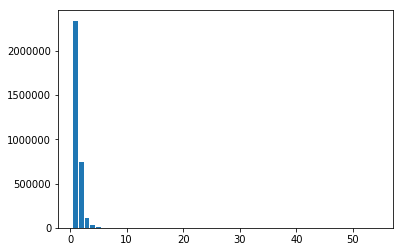

In [17]:
plt.bar(range(1, len(pca.explained_variance_ ) + 1), pca.explained_variance_ )
print(np.sum(pca.explained_variance_ratio_[0:5]))

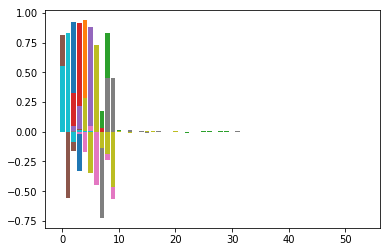

In [11]:
# pca.components_.shape
import matplotlib.pyplot as plt
for i in range(10):
    plt.bar(range(54), pca.components_[:, i])
    plt.plot()


In [14]:
mlTest.saveNpArray([range(1, len(pca.explained_variance_ ) + 1), pca.explained_variance_ ], "COVER-PCA", descriptors="explained_variance")

In [12]:
mlTest.saveNpArray([pca.components_], "COVER-PCA", descriptors="components")

In [27]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=54)
X_ICA = ica.fit_transform(X_train_val)

In [28]:
X_ICA.shape

(15120, 54)

In [29]:
X_train_val.shape

(15120, 54)

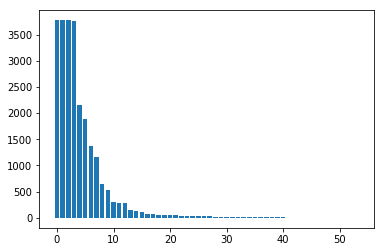

In [128]:
from scipy.stats import kurtosis
K = []
for i in range(54):
    k = kurtosis(X_ICA[:, i])
    K.append(k)
indices = np.argsort(K)
indices = indices[::-1]
K.sort()
K.reverse()
plt.bar(range(len(K)), K)
mlTest.saveNpArray(K, "COVER-ICA", descriptors="sorted-kurtosis")

array([ 2.01614512e-08, -3.01344091e-10,  6.13917123e-05,  5.31483980e-08,
        7.43222616e-06,  4.62094336e-10,  3.54494194e-07, -1.01756200e-06,
       -2.74292034e-08,  1.07167718e-07, -9.59690712e-07,  7.80221293e-08,
       -8.35711444e-06, -7.21308129e-07,  5.68490314e-08,  1.88769503e-07,
       -1.84523129e-06,  5.84460906e-07,  2.29015892e-07,  5.35727436e-08,
       -1.25345211e-08,  8.84122234e-07,  2.62593408e-10, -1.95488602e-07,
       -6.91032805e-07, -6.84447776e-07, -4.79132745e-07,  1.61169966e-07,
       -5.76417868e-07, -2.78386945e-07,  1.08381367e-06,  9.21442172e-07,
        3.95513554e-08, -2.03112090e-05,  3.90024115e-07, -2.63677941e-07,
       -1.36637886e-07, -4.08174604e-07,  1.19641420e-06, -1.86115114e-07,
       -7.67223914e-07,  4.59451803e-07, -9.87932488e-07,  8.83862448e-08,
       -3.74344882e-06,  3.63540491e-07,  2.84702104e-08,  2.32727082e-07,
       -3.65530978e-10,  2.14516310e-08,  9.64656454e-07, -1.02603335e-06,
        8.65443140e-09, -

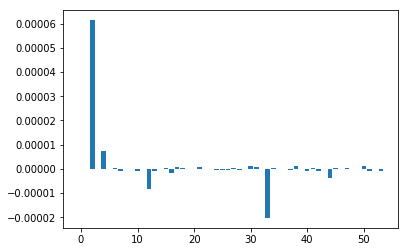

In [147]:
# pca.components_.shape
import matplotlib.pyplot as plt
for i in range(1):
    plt.bar(range(54), ica.components_[:, indices[i]])
    plt.plot()

mlTest.saveNpArray(ica.components_[:, indices[0]], "COVER-ICA", descriptors="highest-kurtosis-axis")
ica.components_[:, indices[0]]

In [57]:
from scipy.stats import kurtosis
K1 = []
for i in range(54):
    k = kurtosis(X_train_val.values[:, i])
    K1.append(k)
# K1.sort()
# K1.reverse()
# plt.bar(range(15), K1[0:10])
mlTest.saveNpArray(K1, "COVER-PLAIN", descriptors="kurtosis")

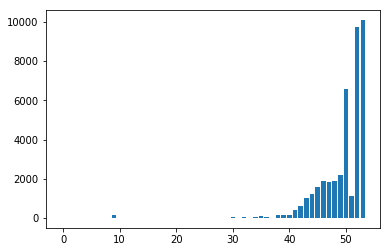

In [47]:
from scipy.stats import kurtosis
KPCA = []
for i in range(54):
    k = kurtosis(X_PCA[:, i])
    KPCA.append(k)
# KPCA.sort()
plt.bar(range(len(K)), KPCA)
mlTest.saveNpArray(K, "COVER-PCA", descriptors="kurtosis")

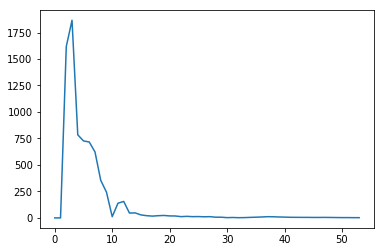

In [34]:
plt.plot(np.array(K) - np.array(K1))

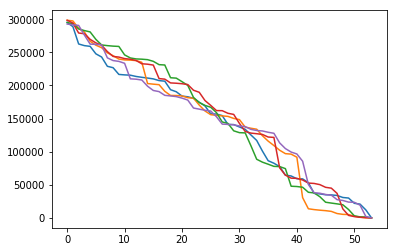

In [89]:
from sklearn import random_projection
Eseeds = []
for s in range(5):
    E = []
    for i in range(1, 55):
        transformer = random_projection.GaussianRandomProjection(n_components=i, random_state=s)
        X_random = transformer.fit_transform(X_train_val)
        cInv = np.linalg.pinv(transformer.components_)
        X_psuedo = np.matmul(cInv,X_random.transpose())
        X_psuedo = X_psuedo.transpose()
        error = ((X_train_val.values - X_psuedo) ** 2).mean()
        E.append(error)
    Eseeds.append(E)

for e in Eseeds:
    plt.plot(range(len(e)), e)

In [96]:
mlTest.saveNpArray(Eseeds, "COVER-RAND", descriptors="reconstruction-error")

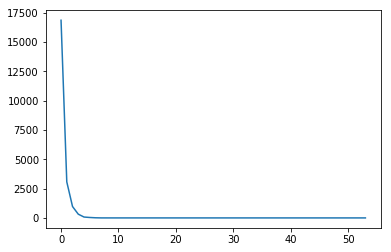

In [124]:
from sklearn import random_projection
E = []
for i in range(1, 55):
    transformer = PCA(n_components=i)
    X_p = transformer.fit_transform(X_train_val)
    error = ((X_train_val.values - transformer.inverse_transform(X_p)) ** 2).mean()
    E.append(error)

plt.plot(E)
    
    
# p = PCA()
# X_p = p.fit_transform(X_train_val)
mlTest.saveNpArray(E, "COVER-PCA", descriptors="reconstruction-error")

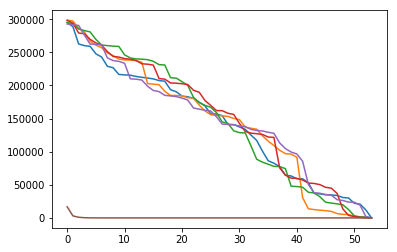

In [98]:
for e in Eseeds:
    plt.plot(range(len(e)), e)
plt.plot(E)

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterat

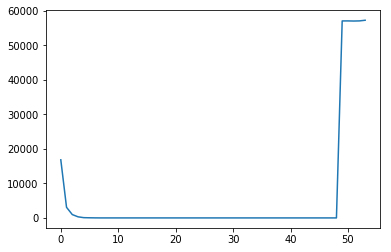

In [123]:
from sklearn import random_projection
E = []
for i in range(1, 55):
    transformer = FastICA(n_components=i)
    X_p = transformer.fit_transform(X_train_val)
    error = ((X_train_val.values - transformer.inverse_transform(X_p)) ** 2).mean()
    E.append(error)

plt.plot(E)
    
    
# p = PCA()
# X_p = p.fit_transform(X_train_val)
mlTest.saveNpArray(E, "COVER-ICA", descriptors="reconstruction-error")

In [116]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=2)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X_train_val, y_train_val)

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [20 21 28] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([[3118,    0],
       [3109,    0],
       [2793,    0],
       ...,
       [3837,    0],
       [3280,    0],
       [3368,    0]], dtype=int64)

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [20 21 28] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [20 21 28] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [20 21 28] are con

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [20 21 28] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [20 21 28] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [20 21 28] are con

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [20 21 28] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [20 21 28] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [20 21 28] are con

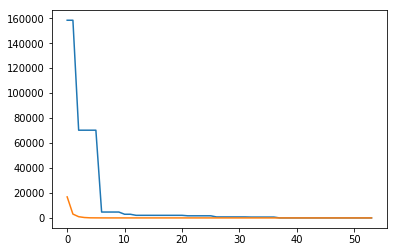

In [125]:
E_best = []
for i in range(1, 55):
    fvalue_selector = SelectKBest(f_classif, k=i)
    # Apply the SelectKBest object to the features and target
    X_kbest = fvalue_selector.fit_transform(X_train_val, y_train_val)
    error = ((X_train_val.values - fvalue_selector.inverse_transform(X_kbest)) ** 2).mean()
    E_best.append(error)

plt.plot(E_best)
plt.plot(E)

In [126]:
mlTest.saveNpArray(E_best, "COVER-ANOVA", descriptors="reconstruction-error")

CLUSERRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR

In [148]:
# from sklearn.decomposition import PCA
pca = PCA()
X_PCA = pca.fit_transform(X_train_val)


In [149]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    print("k = {}".format(k))
    km = KMeans(n_clusters=k)
    km = km.fit(X_PCA)
    Sum_of_squared_distances.append(km.inertia_)

k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12
k = 13
k = 14


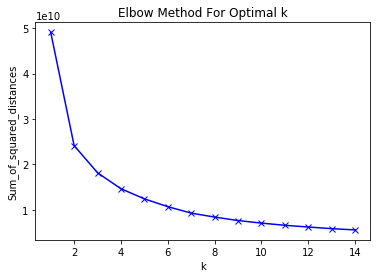

In [150]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
#optimal ~4

In [151]:
mlTest.saveNpArray([range(1, 15), Sum_of_squared_distances], "COVER-PCA-KMeans", descriptors="54d-ssd")

In [152]:
# from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_PCA = pca.fit_transform(X_train_val)
from sklearn.cluster import KMeans
Sum_of_squared_distances5 = []
K = range(1,15)
for k in K:
    print("k = {}".format(k))
    km = KMeans(n_clusters=k)
    km = km.fit(X_PCA)
    Sum_of_squared_distances5.append(km.inertia_)

k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12
k = 13
k = 14


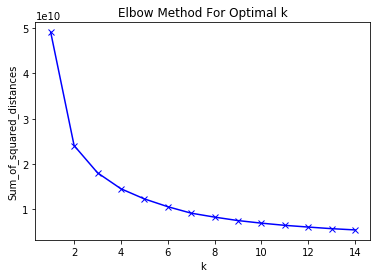

In [156]:
plt.plot(K, Sum_of_squared_distances5, 'bx-')
# plt.plot(K, Sum_of_squared_distances, 'x-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
#optimal ~4

In [160]:
# from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_PCA = pca.fit_transform(X_train_val)
from sklearn.cluster import KMeans
Sum_of_squared_distances3 = []
K = range(1,15)
for k in K:
    print("k = {}".format(k))
    km = KMeans(n_clusters=k)
    km = km.fit(X_PCA)
    Sum_of_squared_distances3.append(km.inertia_)

k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12
k = 13
k = 14


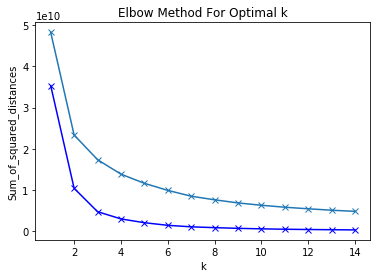

In [161]:
plt.plot(K, Sum_of_squared_distances5, 'bx-')
plt.plot(K, Sum_of_squared_distances3, 'x-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
#optimal ~4
mlTest.saveNpArray([Sum_of_squared_distances3], "COVER-PCA", descriptors="components")

In [162]:
d1 = "20190319-165126-COVER-TSNE-.npy"
X_TSNE = np.load("npData/" + d1)
d1 = "20190319-165126-COVER-Data-.npy"
X =np.load("npData/" + d1)
d1 = "20190319-165126-COVER-y-.npy"
y =np.load("npData/" + d1)

In [163]:
# from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_PCA = pca.fit_transform(X)
from sklearn.cluster import KMeans
Sum_of_squared_distances3 = []
K = range(1,15)
for k in K:
    print("k = {}".format(k))
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances3.append(km.inertia_)

k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12
k = 13
k = 14


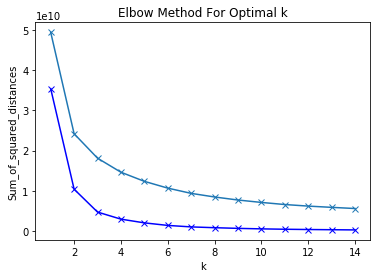

In [164]:
plt.plot(K, Sum_of_squared_distances5, 'bx-')
plt.plot(K, Sum_of_squared_distances3, 'x-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#optimal ~4


In [165]:
# from sklearn.decomposition import PCA
pca = FastICA(n_components=3)
X_PCA = pca.fit_transform(X)
from sklearn.cluster import KMeans
Sum_of_squared_distances3 = []
K = range(1,15)
for k in K:
    print("k = {}".format(k))
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances3.append(km.inertia_)

k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12
k = 13
k = 14


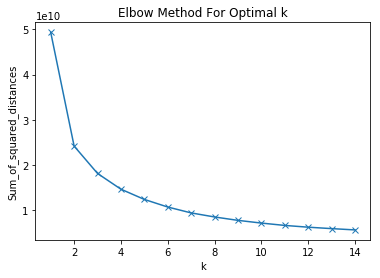

In [166]:
# plt.plot(K, Sum_of_squared_distances5, 'bx-')
plt.plot(K, Sum_of_squared_distances3, 'x-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
#optimal ~4

In [190]:
# from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_PCA = pca.fit_transform(X)
X_PCA

array([[ 991.24626139, 1554.65890975,  364.48756746],
       [4964.21905662,  668.84707923, -629.43939842],
       [2987.65954572, 1068.5728512 , -257.52365197],
       ...,
       [ 506.21487427, -565.00006696,  476.8841697 ],
       [3683.84046716,  582.35047697, -174.52920834],
       [-954.27784743, -184.59548785,  568.91445863]])

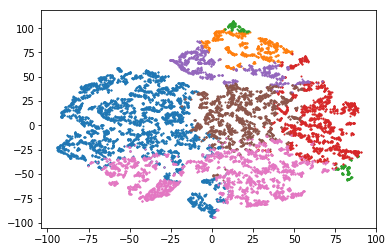

In [191]:
km = KMeans(n_clusters=7)
km = km.fit(X_PCA)
mlTest.saveNpArray(km.labels_, "COVER-KMeans-PCA", descriptors="3c-7k-labels")
for i in range(0, 40):
    where = np.where(km.labels_ ==i)
    plt.scatter(X_TSNE[where, 0], X_TSNE[where, 1], s=1)

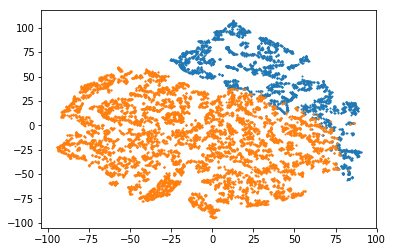

In [192]:
# from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_PCA = pca.fit_transform(X)
km = KMeans(n_clusters=2)
km = km.fit(X_PCA)
mlTest.saveNpArray(km.labels_, "COVER-KMeans-PCA", descriptors="3c-2k-labels")
for i in range(0, 40):
    where = np.where(km.labels_ ==i)
    plt.scatter(X_TSNE[where, 0], X_TSNE[where, 1], s=1)

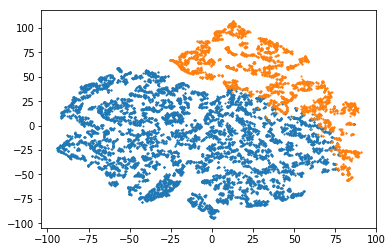

In [193]:
# from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_PCA = pca.fit_transform(X)
km = KMeans(n_clusters=2)
km = km.fit(X_PCA)
mlTest.saveNpArray(km.labels_, "COVER-KMeans-PCA", descriptors="6c-2k-labels")
for i in range(0, 40):
    where = np.where(km.labels_ ==i)
    plt.scatter(X_TSNE[where, 0], X_TSNE[where, 1], s=1)

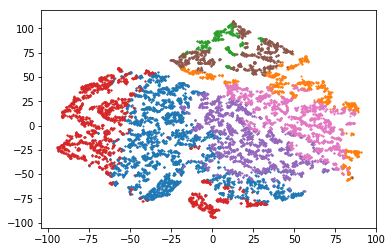

In [195]:
# from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_PCA = pca.fit_transform(X)
km = KMeans(n_clusters=7)
km = km.fit(X_PCA)
mlTest.saveNpArray(km.labels_, "COVER-KMeans-PCA", descriptors="1c-7k-labels")
for i in range(0, 40):
    where = np.where(km.labels_ ==i)
    plt.scatter(X_TSNE[where, 0], X_TSNE[where, 1], s=1)

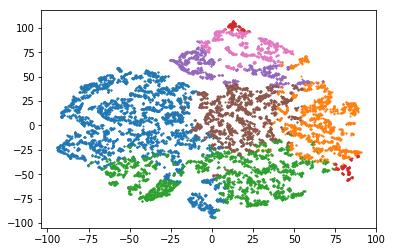

In [194]:
# from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_PCA = pca.fit_transform(X)
km = KMeans(n_clusters=7)
km = km.fit(X_PCA)
mlTest.saveNpArray(km.labels_, "COVER-KMeans-PCA", descriptors="6c-2k-labels")
for i in range(0, 40):
    where = np.where(km.labels_ ==i)
    plt.scatter(X_TSNE[where, 0], X_TSNE[where, 1], s=1)

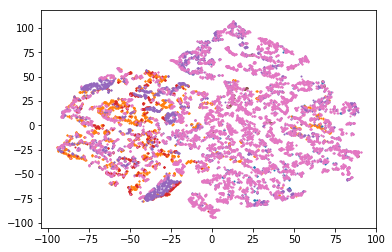

In [196]:
from sklearn.decomposition import FastICA
ica = FastICA()
X_ICA = ica.fit_transform(X)
km = KMeans(n_clusters=7)
km = km.fit(X_ICA)
mlTest.saveNpArray(km.labels_, "COVER-KMeans-ICA", descriptors="fc-7k-labels")
for i in range(0, 40):
    where = np.where(km.labels_ ==i)
    plt.scatter(X_TSNE[where, 0], X_TSNE[where, 1], s=1)

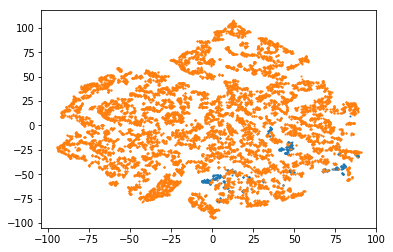

In [197]:
from sklearn.decomposition import FastICA
ica = FastICA()
X_ICA = ica.fit_transform(X)
km = KMeans(n_clusters=2)
km = km.fit(X_ICA)
mlTest.saveNpArray(km.labels_, "COVER-KMeans-ICA", descriptors="fc-2k-labels")
for i in range(0, 40):
    where = np.where(km.labels_ ==i)
    plt.scatter(X_TSNE[where, 0], X_TSNE[where, 1], s=1)

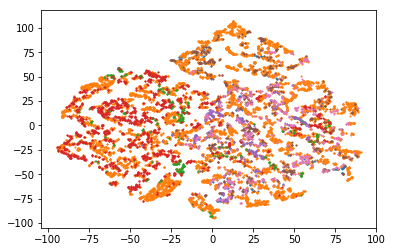

In [199]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=30)
X_ICA = ica.fit_transform(X)
km = KMeans(n_clusters=7)
km = km.fit(X_ICA)
mlTest.saveNpArray(km.labels_, "COVER-KMeans-ICA", descriptors="30c-7k-labels")
for i in range(0, 40):
    where = np.where(km.labels_ ==i)
    plt.scatter(X_TSNE[where, 0], X_TSNE[where, 1], s=1)

In [205]:
from scipy import stats

def ISApurityCalculation(X, y, k, min_c, max_c):
    
    
    
    
    C = range(min_c,max_c + 1, 5)
    purityAvg = []
    for co in C:
        print("co = {}".format(co))
        
        ica = FastICA(n_components=co)
        X_ICA = ica.fit_transform(X)
        km = KMeans(n_clusters=k)
        km = km.fit(X_ICA)
        
        #for each cluster
        M = []
        for c in range(k):
            cy = y[np.where(km.labels_ == c)[0]]
            m = stats.mode(cy)
#             M.append(m[1][0] / np.count_nonzero(y == m[0][0]))
            M.append(m[1][0] / len(cy))
#             print(M)
        purityAvg.append(np.mean(M))
        print(np.mean(M))
    return purityAvg
avg = ISApurityCalculation(X, y, k=2, min_c=1, max_c=55)   

co = 1
0.2632472450064962
co = 6
0.18369864146941473
co = 11


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


0.23238257949474478
co = 16
0.3427615374643505
co = 21
0.2822522637400727
co = 26
0.35279801514390113
co = 31
0.22091773501610096
co = 36
0.28116888108373395
co = 41
0.2704899651405318
co = 46
0.5090934357684843
co = 51
0.288309322104816


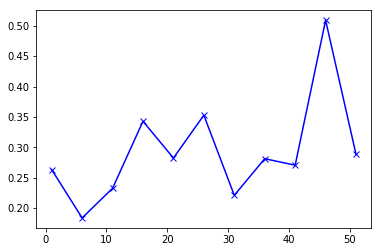

In [206]:
plt.plot(range(1, 56, 5), avg, 'bx-')

In [207]:
from scipy import stats

def ISApurityCalculation(X, y, k, min_c, max_c):
    C = range(min_c,max_c + 1, 5)
    purityAvg = []
    for co in C:
        print("co = {}".format(co))
        
        ica = FastICA(n_components=co)
        X_ICA = ica.fit_transform(X)
        km = KMeans(n_clusters=k)
        km = km.fit(X_ICA)
        
        #for each cluster
        M = []
        for c in range(k):
            cy = y[np.where(km.labels_ == c)[0]]
            m = stats.mode(cy)
#             M.append(m[1][0] / np.count_nonzero(y == m[0][0]))
            M.append(m[1][0] / len(cy))
#             print(M)
        purityAvg.append(np.mean(M))
        print(np.mean(M))
    return purityAvg
avg1 = ISApurityCalculation(X, y, k=7, min_c=1, max_c=55)   

co = 1
0.3469970733986957
co = 6
0.3280369179425984
co = 11


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


0.33734861106174957
co = 16
0.4896652449387342
co = 21
0.527670887567715
co = 26
0.45268261625821493
co = 31
0.5953725886760611
co = 36
0.46162130779692084
co = 41
0.434637115104112
co = 46
0.5060320454464525
co = 51
0.6268317500963748


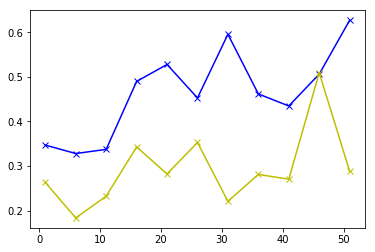

In [208]:
plt.plot(range(1, 56, 5), avg1, 'bx-')
plt.plot(range(1, 56, 5), avg, 'yx-')

In [ ]:
from scipy import stats

def ISACaptureCalculation(X, y, k, min_c, max_c):
    C = range(min_c,max_c + 1, 5)
    purityAvg = []
    for co in C:
        print("co = {}".format(co))
        
        ica = FastICA(n_components=co)
        X_ICA = ica.fit_transform(X)
        km = KMeans(n_clusters=k)
        km = km.fit(X_ICA)
        
        #for each cluster
        M = []
        for c in range(k):
            cy = y[np.where(km.labels_ == c)[0]]
            m = stats.mode(cy)
#             M.append(m[1][0] / np.count_nonzero(y == m[0][0]))
            M.append(m[1][0] / len(cy))
#             print(M)
        purityAvg.append(np.mean(M))
        print(np.mean(M))
    return purityAvg
avg1 = ISApurityCalculation(X, y, k=7, min_c=1, max_c=55)   

In [212]:
# ica = FastICA(n_components=co)
# X_ICA = ica.fit_transform(X)
km = KMeans(n_clusters=7)
km = km.fit(X)
M = []
for c in range(7):
    cy = y[np.where(km.labels_ == c)[0]]
    m = stats.mode(cy)
    print(m)
    M.append(m[1][0] / len(cy))
print(np.mean(M))

ModeResult(mode=array([5], dtype=int64), count=array([785]))
ModeResult(mode=array([7], dtype=int64), count=array([464]))
ModeResult(mode=array([4], dtype=int64), count=array([1668]))
ModeResult(mode=array([7], dtype=int64), count=array([573]))
ModeResult(mode=array([7], dtype=int64), count=array([545]))
ModeResult(mode=array([2], dtype=int64), count=array([113]))
ModeResult(mode=array([1], dtype=int64), count=array([429]))
0.34432163641765884


In [213]:
km = KMeans(n_clusters=7)
km = km.fit(X)
M = []
for c in range(7):
    cy = y[np.where(km.labels_ == c)[0]]
    m = stats.mode(cy)
    print(m)
    M.append(m[1][0] / np.count_nonzero(y == m[0][0]))
#     M.append(m[1][0] / len(cy))
print(np.mean(M))

ModeResult(mode=array([7], dtype=int64), count=array([542]))
ModeResult(mode=array([5], dtype=int64), count=array([781]))
ModeResult(mode=array([1], dtype=int64), count=array([429]))
ModeResult(mode=array([7], dtype=int64), count=array([571]))
ModeResult(mode=array([2], dtype=int64), count=array([114]))
ModeResult(mode=array([7], dtype=int64), count=array([461]))
ModeResult(mode=array([4], dtype=int64), count=array([1681]))
0.3028439153439154


In [231]:
#purity
ica = FastICA(n_components=15)
X_ICA = ica.fit_transform(X)
km = KMeans(n_clusters=7)
km = km.fit(X_ICA)
M = []
for c in range(7):
    cy = y[np.where(km.labels_ == c)[0]]
    m = stats.mode(cy)
    print(m)
    M.append(m[1][0] / len(cy))
print(np.mean(M))

ModeResult(mode=array([3], dtype=int64), count=array([480]))
ModeResult(mode=array([5], dtype=int64), count=array([1112]))
ModeResult(mode=array([7], dtype=int64), count=array([1799]))
ModeResult(mode=array([6], dtype=int64), count=array([1105]))
ModeResult(mode=array([2], dtype=int64), count=array([546]))
ModeResult(mode=array([4], dtype=int64), count=array([1853]))
ModeResult(mode=array([1], dtype=int64), count=array([601]))
0.49138049633242364


In [232]:
#capture
ica = FastICA(n_components=15)
X_ICA = ica.fit_transform(X)
km = KMeans(n_clusters=7)
km = km.fit(X_ICA)
M = []
for c in range(7):
    cy = y[np.where(km.labels_ == c)[0]]
    m = stats.mode(cy)
    print(m)
    M.append(m[1][0] / np.count_nonzero(y == m[0][0]))
print(np.mean(M))

ModeResult(mode=array([4], dtype=int64), count=array([1176]))
ModeResult(mode=array([7], dtype=int64), count=array([1739]))
ModeResult(mode=array([4], dtype=int64), count=array([811]))
ModeResult(mode=array([6], dtype=int64), count=array([1105]))
ModeResult(mode=array([5], dtype=int64), count=array([1106]))
ModeResult(mode=array([2], dtype=int64), count=array([546]))
ModeResult(mode=array([1], dtype=int64), count=array([616]))
0.469510582010582


In [273]:
transformer = random_projection.GaussianRandomProjection(n_components=5, random_state=0)
X_random = transformer.fit_transform(X)
km = KMeans(n_clusters=7)
km = km.fit(X_random)
M = []
for c in range(7):
    cy = y[np.where(km.labels_ == c)[0]]
    m = stats.mode(cy)
    print(m)
    M.append(m[1][0] / len(cy))
print(np.mean(M))

ModeResult(mode=array([1], dtype=int64), count=array([401]))
ModeResult(mode=array([5], dtype=int64), count=array([832]))
ModeResult(mode=array([1], dtype=int64), count=array([336]))
ModeResult(mode=array([5], dtype=int64), count=array([824]))
ModeResult(mode=array([7], dtype=int64), count=array([619]))
ModeResult(mode=array([4], dtype=int64), count=array([1880]))
ModeResult(mode=array([7], dtype=int64), count=array([499]))
0.3730467184945638


In [274]:
transformer = random_projection.GaussianRandomProjection(n_components=5, random_state=0)
X_random = transformer.fit_transform(X)
km = KMeans(n_clusters=7)
km = km.fit(X_random)
M = []
for c in range(7):
    cy = y[np.where(km.labels_ == c)[0]]
    m = stats.mode(cy)
    print(m)
    M.append(m[1][0] / np.count_nonzero(y == m[0][0]))
print(np.mean(M))

ModeResult(mode=array([7], dtype=int64), count=array([622]))
ModeResult(mode=array([1], dtype=int64), count=array([401]))
ModeResult(mode=array([4], dtype=int64), count=array([1878]))
ModeResult(mode=array([7], dtype=int64), count=array([487]))
ModeResult(mode=array([5], dtype=int64), count=array([825]))
ModeResult(mode=array([1], dtype=int64), count=array([342]))
ModeResult(mode=array([5], dtype=int64), count=array([831]))
0.35621693121693127


In [247]:
fvalue_selector = SelectKBest(f_classif, k=2)
X_kbest = fvalue_selector.fit_transform(X_train_val, y_train_val)
km = KMeans(n_clusters=7)
km = km.fit(X_kbest)
M = []
for c in range(7):
    cy = y[np.where(km.labels_ == c)[0]]
    m = stats.mode(cy)
    print(m)
    M.append(m[1][0] / len(cy))
print(np.mean(M))

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [20 21 28] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


ModeResult(mode=array([4], dtype=int64), count=array([1109]))
ModeResult(mode=array([2], dtype=int64), count=array([960]))
ModeResult(mode=array([7], dtype=int64), count=array([1689]))
ModeResult(mode=array([6], dtype=int64), count=array([850]))
ModeResult(mode=array([1], dtype=int64), count=array([1210]))
ModeResult(mode=array([5], dtype=int64), count=array([1456]))
ModeResult(mode=array([4], dtype=int64), count=array([1030]))
0.5541202389022075


In [246]:
fvalue_selector = SelectKBest(f_classif, k=2)
X_kbest = fvalue_selector.fit_transform(X_train_val, y_train_val)
km = KMeans(n_clusters=7)
km = km.fit(X_kbest)
M = []
for c in range(7):
    cy = y[np.where(km.labels_ == c)[0]]
    m = stats.mode(cy)
    print(m)
    M.append(m[1][0] / np.count_nonzero(y == m[0][0]))
print(np.mean(M))

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [20 21 28] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


ModeResult(mode=array([6], dtype=int64), count=array([850]))
ModeResult(mode=array([7], dtype=int64), count=array([1689]))
ModeResult(mode=array([2], dtype=int64), count=array([960]))
ModeResult(mode=array([1], dtype=int64), count=array([1210]))
ModeResult(mode=array([4], dtype=int64), count=array([1030]))
ModeResult(mode=array([5], dtype=int64), count=array([1456]))
ModeResult(mode=array([4], dtype=int64), count=array([1109]))
0.5492063492063491


In [251]:
pca = PCA(n_components=4)
X_PCA = pca.fit_transform(X)
km = KMeans(n_clusters=7)
km = km.fit(X_PCA)
M = []
for c in range(7):
    cy = y[np.where(km.labels_ == c)[0]]
    m = stats.mode(cy)
    print(m)
    M.append(m[1][0] / len(cy))
print(np.mean(M))

ModeResult(mode=array([5], dtype=int64), count=array([782]))
ModeResult(mode=array([7], dtype=int64), count=array([462]))
ModeResult(mode=array([7], dtype=int64), count=array([545]))
ModeResult(mode=array([4], dtype=int64), count=array([1671]))
ModeResult(mode=array([2], dtype=int64), count=array([113]))
ModeResult(mode=array([1], dtype=int64), count=array([429]))
ModeResult(mode=array([7], dtype=int64), count=array([574]))
0.34399670863046916


In [252]:
pca = PCA(n_components=4)
X_PCA = pca.fit_transform(X)
km = KMeans(n_clusters=7)
km = km.fit(X_PCA)
M = []
for c in range(7):
    cy = y[np.where(km.labels_ == c)[0]]
    m = stats.mode(cy)
    print(m)
    M.append(m[1][0] / np.count_nonzero(y == m[0][0]))
print(np.mean(M))

ModeResult(mode=array([7], dtype=int64), count=array([572]))
ModeResult(mode=array([4], dtype=int64), count=array([1660]))
ModeResult(mode=array([5], dtype=int64), count=array([787]))
ModeResult(mode=array([7], dtype=int64), count=array([547]))
ModeResult(mode=array([2], dtype=int64), count=array([113]))
ModeResult(mode=array([1], dtype=int64), count=array([429]))
ModeResult(mode=array([7], dtype=int64), count=array([464]))
0.3023809523809523


co = 1
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.198

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111

[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111

[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\decomposition\fastica_.py:305: UserWarning: n_components is too large: it will be set to 54
  warnings.warn('n_components is too large: it will be set to %s' % n_components)


[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111

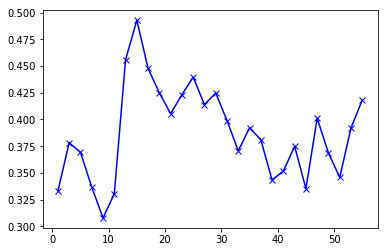

In [253]:
from scipy import stats

def ISApurityCalculation(X, y, k, min_c, max_c):
    C = range(min_c,max_c + 1, 2)
    hMean = []
    for co in C:
        print("co = {}".format(co))
        
        ica = FastICA(n_components=co)
        X_ICA = ica.fit_transform(X)
        km = KMeans(n_clusters=k)
        km = km.fit(X_ICA)
        
        #for each cluster
        MPurity = []
        MCapture = []
        for c in range(k):
            cy = y[np.where(km.labels_ == c)[0]]
            m = stats.mode(cy)
            MPurity.append(m[1][0] / len(cy))
            MCapture.append(m[1][0] / np.count_nonzero(y == m[0][0]))
            print(M)
        
        harmonic = 2.0 * np.mean(MPurity) * np.mean(MCapture) / (np.mean(MPurity) + np.mean(MCapture))
        hMean.append(harmonic)
        print(harmonic)
    return hMean
test = ISApurityCalculation(X, y, k=7, min_c=1, max_c=55) 
plt.plot(range(1, 56, 2), test, 'bx-')


In [255]:
mlTest.saveNpArray([range(1, 56, 2), test], "COVER-ICA", descriptors="clusterTest")

co = 1
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.198

[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111

[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111

[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111

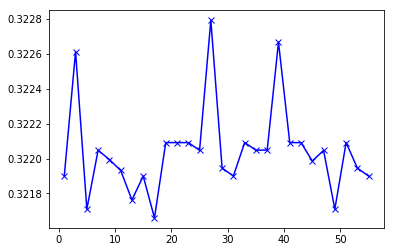

In [256]:
from scipy import stats

def PCApurityCalculation(X, y, k, min_c, max_c):
    C = range(min_c,max_c + 1, 2)
    hMean = []
    for co in C:
        print("co = {}".format(co))
        
        pca = PCA()
        X_PCA = pca.fit_transform(X)
        km = KMeans(n_clusters=k)
        km = km.fit(X_PCA)
        
        #for each cluster
        MPurity = []
        MCapture = []
        for c in range(k):
            cy = y[np.where(km.labels_ == c)[0]]
            m = stats.mode(cy)
            MPurity.append(m[1][0] / len(cy))
            MCapture.append(m[1][0] / np.count_nonzero(y == m[0][0]))
            print(M)
        
        harmonic = 2.0 * np.mean(MPurity) * np.mean(MCapture) / (np.mean(MPurity) + np.mean(MCapture))
        hMean.append(harmonic)
        print(harmonic)
    return hMean
test = PCApurityCalculation(X, y, k=7, min_c=1, max_c=55) 
plt.plot(range(1, 56, 2), test, 'bx-')


In [257]:
mlTest.saveNpArray([range(1, 56, 2), test], "COVER-PCA", descriptors="clusterTest")

co = 1
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.198

[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111

[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111

[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (54 < 55).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111111111, 0.21481481481481482]
[0.26481481481481484, 0.7685185185185185, 0.36435185185185187, 0.25324074074074077, 0.052314814814814814, 0.1986111111

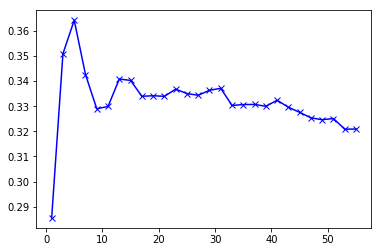

In [258]:
from scipy import stats

def PCApurityCalculation(X, y, k, min_c, max_c):
    C = range(min_c,max_c + 1, 2)
    hMean = []
    for co in C:
        print("co = {}".format(co))
        
        transformer = random_projection.GaussianRandomProjection(n_components=co, random_state=0)
        X_random = transformer.fit_transform(X)
        km = KMeans(n_clusters=k)
        km = km.fit(X_random)
        
        #for each cluster
        MPurity = []
        MCapture = []
        for c in range(k):
            cy = y[np.where(km.labels_ == c)[0]]
            m = stats.mode(cy)
            MPurity.append(m[1][0] / len(cy))
            MCapture.append(m[1][0] / np.count_nonzero(y == m[0][0]))
            print(M)
        
        harmonic = 2.0 * np.mean(MPurity) * np.mean(MCapture) / (np.mean(MPurity) + np.mean(MCapture))
        hMean.append(harmonic)
#         print(harmonic)
    return hMean
test = PCApurityCalculation(X, y, k=7, min_c=1, max_c=55) 
plt.plot(range(1, 56, 2), test, 'bx-')
mlTest.saveNpArray([range(1, 56, 2), test], "COVER-RP", descriptors="clusterTest")

In [267]:
from scipy import stats

def PCApurityCalculation(X, y, k, min_c, max_c):
    C = range(min_c,max_c, 2)
    hMean = []
    for co in C:
        print("co = {}".format(co))
        
        fvalue_selector = SelectKBest(f_classif, k=co)
        X_kbest = fvalue_selector.fit_transform(X, y)
        km = KMeans(n_clusters=k)
        km = km.fit(X_kbest)
        
        #for each cluster
        MPurity = []
        MCapture = []
        for c in range(k):
            cy = y[np.where(km.labels_ == c)[0]]
            m = stats.mode(cy)
            MPurity.append(m[1][0] / len(cy))
            MCapture.append(m[1][0] / np.count_nonzero(y == m[0][0]))
#             print(M)
        
        harmonic = 2.0 * np.mean(MPurity) * np.mean(MCapture) / (np.mean(MPurity) + np.mean(MCapture))
        hMean.append(harmonic)
        print(harmonic)
    return hMean
test = PCApurityCalculation(X, y, k=7, min_c=1, max_c=55) 
plt.plot(range(1, 56, 2), test, 'bx-')
mlTest.saveNpArray([range(1, 55, 2), test], "COVER-ANOVA", descriptors="clusterTest")

co = 1


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.5403940856917695
co = 3


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.3390344283639704
co = 5


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.33858783196048675
co = 7


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


KeyboardInterrupt: 

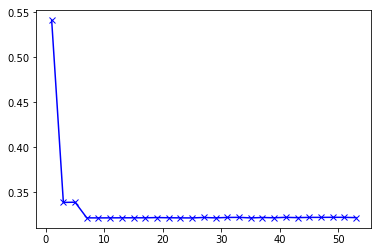

In [268]:
plt.plot(range(1, 55, 2), test, 'bx-')
mlTest.saveNpArray([range(1, 55, 2), test], "COVER-ANOVA", descriptors="clusterTest")

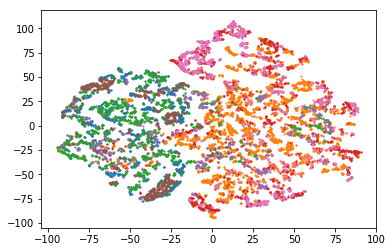

In [296]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=15)
X_ICA = ica.fit_transform(X)
km = KMeans(n_clusters=7)
km = km.fit(X_ICA)
mlTest.saveNpArray(km.labels_, "COVER-KMeans-ICA", descriptors="15c-7k-labels")
for i in range(0, 40):
    where = np.where(km.labels_ ==i)
    plt.scatter(X_TSNE[where, 0], X_TSNE[where, 1], s=1)

In [ ]:
fvalue_selector = SelectKBest(f_classif, k=1)
X_kbest = fvalue_selector.fit_transform(X, y)
km = KMeans(n_clusters=7)
km = km.fit(X_kbest)
mlTest.saveNpArray(km.labels_, "COVER-KMeans-ICA", descriptors="15c-7k-labels")
for i in range(0, 40):
    where = np.where(km.labels_ ==i)
    plt.scatter(X_TSNE[where, 0], X_TSNE[where, 1], s=1)

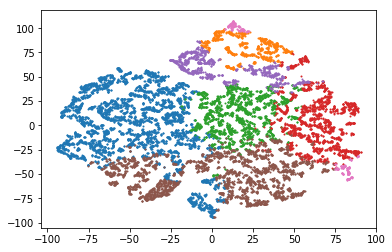

In [276]:
pca = PCA(n_components=5)
X_PCA = pca.fit_transform(X)
km = KMeans(n_clusters=7)
km = km.fit(X_PCA)
mlTest.saveNpArray(km.labels_, "COVER-KMeans-PCA", descriptors="5c-7k-labels")
for i in range(0, 40):
    where = np.where(km.labels_ ==i)
    plt.scatter(X_TSNE[where, 0], X_TSNE[where, 1], s=1)

In [ ]:
pca = PCA(n_components=5)
X_PCA = pca.fit_transform(X)
km = KMeans(n_clusters=7)
km = km.fit(X_PCA)
mlTest.saveNpArray(km.labels_, "COVER-KMeans-PCA", descriptors="5c-7k-labels")
for i in range(0, 40):
    where = np.where(km.labels_ ==i)
    plt.scatter(X_TSNE[where, 0], X_TSNE[where, 1], s=1)

EM

33 0.5631308428974299 0.36653439153439143


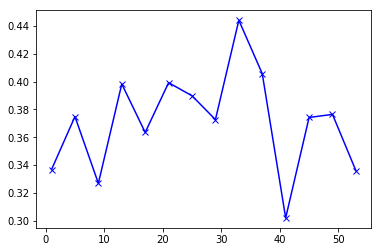

In [289]:
from scipy import stats
from sklearn.mixture import GaussianMixture
def ISApurityCalculation(X, y, k, min_c, max_c):
    C = range(min_c,max_c + 1, 4)
    hMean = []
    pHist = []
    cHist = []
    for co in C:
        print("co = {}".format(co))
        
        ica = FastICA(n_components=co)
        X_ICA = ica.fit_transform(X)
        km = GaussianMixture(n_components=k)
        km = km.fit(X_ICA)
        
        #for each cluster
        MPurity = []
        MCapture = []
        for c in range(k):
            cy = y[np.where(km.predict(X_ICA) == c)[0]]
            m = stats.mode(cy)
            MPurity.append(m[1][0] / len(cy))
            MCapture.append(m[1][0] / np.count_nonzero(y == m[0][0]))
        
        harmonic = 2.0 * np.mean(MPurity) * np.mean(MCapture) / (np.mean(MPurity) + np.mean(MCapture))
        pHist.append(np.mean(MPurity))
        cHist.append(np.mean(MCapture))
        hMean.append(harmonic)
        print(harmonic)
    return hMean, pHist, cHist
# test, pHist, cHist = ISApurityCalculation(X, y, k=7, min_c=1, max_c=54) 
plt.plot(range(1, 55, 4), test, 'bx-')
print(range(1, 55, 4)[np.argmax(test)], pHist[np.argmax(test)], cHist[np.argmax(test)])
mlTest.saveNpArray([range(1, 55, 4), test], "COVER-ICA-EM", descriptors="clusterTest")

co = 1
0.36887345539305194
co = 5
0.3804927036342183
co = 9
0.3804927036342183
co = 13
0.36933168990648735
co = 17
0.36933168990648735
co = 21
0.39933514646177104
co = 25
0.3668443911288627
co = 29
0.3945033497121436
co = 33
0.36887345539305194
co = 37
0.36762895418033736
co = 41
0.36887345539305194
co = 45
0.36887345539305194
co = 49
0.36933168990648724
co = 53
0.3693316899064873
21 0.410579262638353 0.3886904761904762


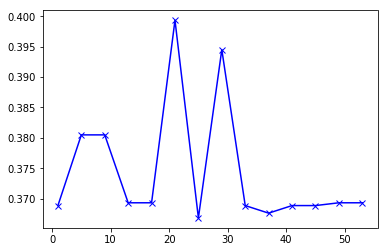

In [292]:
from scipy import stats
from sklearn.mixture import GaussianMixture
def ISApurityCalculation(X, y, k, min_c, max_c):
    C = range(min_c,max_c + 1, 4)
    hMean = []
    pHist = []
    cHist = []
    for co in C:
        print("co = {}".format(co))
        
        pca = PCA()
        X_PCA = pca.fit_transform(X)
        km = GaussianMixture(n_components=k)
        km = km.fit(X_PCA)
        
        #for each cluster
        MPurity = []
        MCapture = []
        for c in range(k):
            cy = y[np.where(km.predict(X_PCA) == c)[0]]
            m = stats.mode(cy)
            MPurity.append(m[1][0] / len(cy))
            MCapture.append(m[1][0] / np.count_nonzero(y == m[0][0]))
        
        harmonic = 2.0 * np.mean(MPurity) * np.mean(MCapture) / (np.mean(MPurity) + np.mean(MCapture))
        pHist.append(np.mean(MPurity))
        cHist.append(np.mean(MCapture))
        hMean.append(harmonic)
        print(harmonic)
    return hMean, pHist, cHist
test, pHist, cHist = ISApurityCalculation(X, y, k=7, min_c=1, max_c=54) 
plt.plot(range(1, 55, 4), test, 'bx-')
print(range(1, 55, 4)[np.argmax(test)], pHist[np.argmax(test)], cHist[np.argmax(test)])
mlTest.saveNpArray([range(1, 55, 4), test], "COVER-PCA-EM", descriptors="clusterTest")

co = 1
0.2879127591472171
co = 5
0.37154966205681633
co = 9
0.3066037104899215
co = 13
0.27991293849234866
co = 17
0.35930410272169694
co = 21
0.3685200391243224
co = 25
0.35368858974847955
co = 29
0.36303777542440047
co = 33
0.40349067210221173
co = 37
0.4454677544538391
co = 41
0.3993507286516872
co = 45
0.41449083664467207
co = 49
0.4360600270142491
co = 53
0.42356989655077476
37 0.46398357507707255 0.4283730158730159


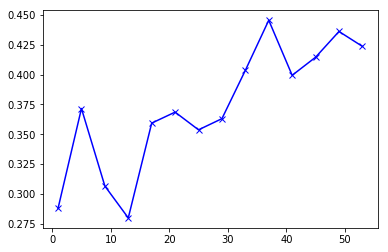

In [294]:
from scipy import stats
from sklearn.mixture import GaussianMixture
def ISApurityCalculation(X, y, k, min_c, max_c):
    C = range(min_c,max_c + 1, 4)
    hMean = []
    pHist = []
    cHist = []
    for co in C:
        print("co = {}".format(co))
        
        transformer = random_projection.GaussianRandomProjection(n_components=co, random_state=0)
        X_random = transformer.fit_transform(X)
        km = GaussianMixture(n_components=k)
        km = km.fit(X_random)
        
        #for each cluster
        MPurity = []
        MCapture = []
        for c in range(k):
            cy = y[np.where(km.predict(X_random) == c)[0]]
            m = stats.mode(cy)
            MPurity.append(m[1][0] / len(cy))
            MCapture.append(m[1][0] / np.count_nonzero(y == m[0][0]))
        
        harmonic = 2.0 * np.mean(MPurity) * np.mean(MCapture) / (np.mean(MPurity) + np.mean(MCapture))
        pHist.append(np.mean(MPurity))
        cHist.append(np.mean(MCapture))
        hMean.append(harmonic)
        print(harmonic)
    return hMean, pHist, cHist
test, pHist, cHist = ISApurityCalculation(X, y, k=7, min_c=1, max_c=54) 
plt.plot(range(1, 55, 4), test, 'bx-')
print(range(1, 55, 4)[np.argmax(test)], pHist[np.argmax(test)], cHist[np.argmax(test)])
mlTest.saveNpArray([range(1, 55, 4), test], "COVER-RP-EM", descriptors="clusterTest")

co = 1
0.5400253340968547
co = 5


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.45180032715973795
co = 9


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.5022226022418848
co = 13


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.5237618159050423
co = 17


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.5074005636434533
co = 21


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.3685690110748707
co = 25


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.33843531111837005
co = 29


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.41541970558612085
co = 33


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.42535756337179537
co = 37


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.4261763338540418
co = 41


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.3995019568106763
co = 45


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.4007055877265208
co = 49


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.39437867045461167
co = 53


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.3945033497121436
1 0.5401036009267464 0.53994708994709


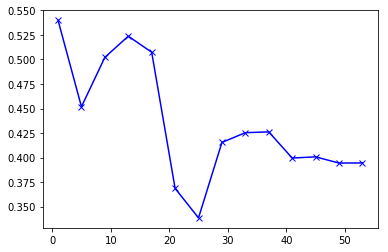

In [295]:
from scipy import stats
from sklearn.mixture import GaussianMixture
def ISApurityCalculation(X, y, k, min_c, max_c):
    C = range(min_c,max_c + 1, 4)
    hMean = []
    pHist = []
    cHist = []
    for co in C:
        print("co = {}".format(co))
        
        fvalue_selector = SelectKBest(f_classif, k=co)
        X_kbest = fvalue_selector.fit_transform(X, y)
        km = GaussianMixture(n_components=k)
        km = km.fit(X_kbest)
        
        #for each cluster
        MPurity = []
        MCapture = []
        for c in range(k):
            cy = y[np.where(km.predict(X_kbest) == c)[0]]
            m = stats.mode(cy)
            MPurity.append(m[1][0] / len(cy))
            MCapture.append(m[1][0] / np.count_nonzero(y == m[0][0]))
        
        harmonic = 2.0 * np.mean(MPurity) * np.mean(MCapture) / (np.mean(MPurity) + np.mean(MCapture))
        pHist.append(np.mean(MPurity))
        cHist.append(np.mean(MCapture))
        hMean.append(harmonic)
        print(harmonic)
    return hMean, pHist, cHist
test, pHist, cHist = ISApurityCalculation(X, y, k=7, min_c=1, max_c=54) 
plt.plot(range(1, 55, 4), test, 'bx-')
print(range(1, 55, 4)[np.argmax(test)], pHist[np.argmax(test)], cHist[np.argmax(test)])
mlTest.saveNpArray([range(1, 55, 4), test], "COVER-ANOVA-EM", descriptors="clusterTest")

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


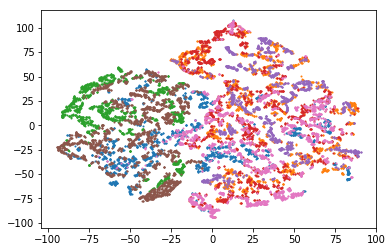

In [297]:
fvalue_selector = SelectKBest(f_classif, k=1)
X_kbest = fvalue_selector.fit_transform(X, y)
km = KMeans(n_clusters=7)
km = km.fit(X_kbest)
mlTest.saveNpArray(km.labels_, "COVER-KMeans-ANOVA", descriptors="1-7k-labels")
for i in range(0, 40):
    where = np.where(km.labels_ ==i)
    plt.scatter(X_TSNE[where, 0], X_TSNE[where, 1], s=1)

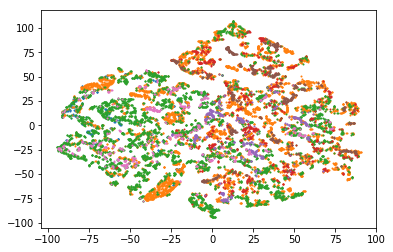

In [309]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=33)
X_ICA = ica.fit_transform(X)
km = GaussianMixture(n_components=7)
km = km.fit(X_ICA)
mlTest.saveNpArray(km.predict(X_ICA), "COVER-EM-ICA", descriptors="33c-7k-labels")
for i in range(0, 40):
    where = np.where(km.predict(X_ICA) ==i)
    plt.scatter(X_TSNE[where, 0], X_TSNE[where, 1], s=1)

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


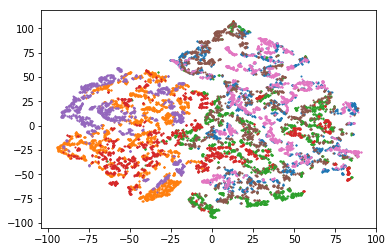

In [310]:
fvalue_selector = SelectKBest(f_classif, k=1)
X_kbest = fvalue_selector.fit_transform(X, y)
km = GaussianMixture(n_components=7)
km = km.fit(X_kbest)
labels = km.predict(X_kbest)
mlTest.saveNpArray(labels, "COVER-EM-ANOVA", descriptors="1c-7k-labels")
for i in range(0, 40):
    where = np.where(labels ==i)
    plt.scatter(X_TSNE[where, 0], X_TSNE[where, 1], s=1)